<h1 class="title">7AAVDM16 Data Visualisation and Analysis - <i>Hearing Secular Britain</i></h1>

<h2>Abstract</h2>

This work seeks to understand the changing nature of religious spaces in England through the study of acoustic data, especially via spectrographic visualisation of field-recordings done at the Strand Campus King&rsquo;s College Chapel (KCL). The space, located withing the university campus, and between teaching and social spaces, provides a unique case-study for the above approach. While the space is a fully functioning religious site, its location means that it is often utilised in secular functions, such as acting as a place for students to prepare for their seminars or have their lunch. 

With the above in mind, this project seeks to argue that through visualising the acoustic characteristics of the chapel, we can begin to understand how its &ldquo;soundscape&rdquo; is changing to reflect more secular functions. Trends of secularism have received much research within humanities and social science methodologies, but little emphasis has been placed on acknowledging its purely acoustic characteristics. In this sense, studying soundscape data can point to new ways of understanding secularisation, and thus help reveal research avenues normally hidden from conventional approaches.    

Relevant audio-recordings were done in the chapel every-working day from 3pm to 3:50pm between 24/02/2020 and 04/03/2020. These were completed as unobtrusively as possible, with the idea of capturing the sound environment of the chapel as close to as it would be normally. During recording, notes were taken about what in particular was happening in the chapel at a given time. Recordings themselves were done with a Zoom model H2n field-recorder, with added accessories at a standard 48 kHz/24 bit format. The final recordings will be processed with Python, utilising relevant modules such as Librosa[1](please see Appendix 1 for initial analyses), as this allows for convenient large-scale audio/signal processing. Ethical approval has already been granted for this project (REMAS reference number: MRSU-19/20-17782)

[1] https://librosa.github.io/librosa/">https://librosa.github.io/librosa/</a>

#### Picture of recording setup in chapel:<br>
<img src="pic.jpg" width=200 height=60 align="left"/>

<h3>Appendix 1 </h3>

#### Exploratory analysis of field recordings with the Librosa module
* Code adapted from: 
 * Read and Visualize Audio Files in Python ("https://www.youtube.com/watch?v=vJ_WL9aYfNI")
 * Librosa documentation ("https://librosa.github.io/librosa/")
 * Librosa examples via Stackoverflow ("https://stackoverflow.com/")

In [1]:
#installing and importing prerequisities
!pip install librosa
!pip install pydub
!pip install soundfile
!pip install -U audio-metadata

import audio_metadata
import soundfile
import librosa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pydub
import matplotlib.pyplot as plot
import re

from scipy.io import wavfile
from glob import glob
from pydub import AudioSegment

Requirement already up-to-date: audio-metadata in /home/otto/anaconda3/lib/python3.7/site-packages (0.11.1)


In [28]:
#checking contents of audio directory
!cd "audio" && ls -a 

.   200224-150236.WAV  200226-151158.WAV  200302-145928.WAV  200304-145243.WAV
..  200225-150422.WAV  200228-150134.WAV  200303-145235.WAV


In [ ]:
#using SoX (shell program) to convert files from 24-bit to 16-bit, and from stereo to mono (useful for SciPy module)
#note: this is for reference here only as this script works only in BASH.

#!cd "audio"; mkdir "converted"; for file in *.wav; do sox $file -r 44100 -b 24 -c 1 converted/$(basename $file) -V; done

In [2]:
#setting variable for .wav files
audio_dir = "audio/converted"
audio_files = glob(audio_dir + "/*.WAV")

#making sure all files are in directory
len(audio_files)

7

In [207]:
##constructing dataframe for recording metadata

#initializing dataframe for file metadata
df = pd.DataFrame()

#df = pd.DataFrame(columns = column_names)
df['file name'] = audio_files

#initializing lists for metadata
filesize = []
bit_depth = []
bitrate = []
channels = []
duration = []
sample_rate = []

#getting and cleaning metadata
for file in range(0, len(audio_files), 1): 
    md = audio_metadata.load(audio_files[file])
    md = str(md)
    md = md.replace("'","").replace("<","").replace(">","").replace("\n","").replace("(","").replace(")","").replace("{","").replace("}","") .replace(" ","")     
    mdList = md.split(",")
    
    filesize.append(mdList[1])
    bit_depth.append(mdList[4])
    bitrate.append(mdList[5])
    channels.append(mdList[6])
    duration.append(mdList[7])
    sample_rate.append(mdList[8])
    
#adding metadata to dataframe
df['filesize'] = filesize
df['bit_depth'] = bit_depth
df['bitrate'] = bitrate
df['channels'] = channels
df['duration'] = duration
df['sample_rate'] = sample_rate

#cleaning dataframe from unecessary strings
df["file name"] = df["file name"].str.replace("audio/converted/", "", case = False)
df["filesize"] = df["filesize"].str.replace("filesize:", "", case = False)
df["bit_depth"] = df["bit_depth"].str.replace("bit_depth:", "", case = False)
df["bitrate"] = df["bitrate"].str.replace("bitrate:", "", case = False)
df["channels"] = df["channels"].str.replace("channels:", "", case = False)
df["duration"] = df["duration"].str.replace("duration:", "", case = False)
df["sample_rate"] = df["sample_rate"].str.replace("sample_rate:", "", case = False)

df

,file name,filesize,bit_depth,bitrate,channels,duration,sample_rate
0,200225-150422.WAV,230.18MiB,16,706Kbps,1,45:37,44.1KHz
1,200304-145243.WAV,268.49MiB,16,706Kbps,1,53:12,44.1KHz
2,200302-145928.WAV,242.37MiB,16,706Kbps,1,48:01,44.1KHz
3,200303-145235.WAV,276.29MiB,16,706Kbps,1,54:45,44.1KHz
4,200224-150236.WAV,229.76MiB,16,706Kbps,1,45:32,44.1KHz
5,200228-150134.WAV,233.24MiB,16,706Kbps,1,46:13,44.1KHz
6,200226-151158.WAV,187.04MiB,16,706Kbps,1,37:04,44.1KHz


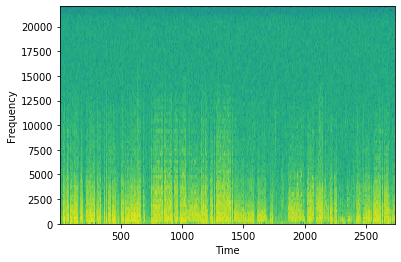

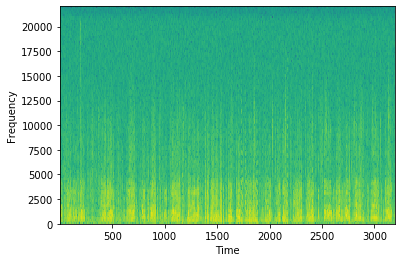

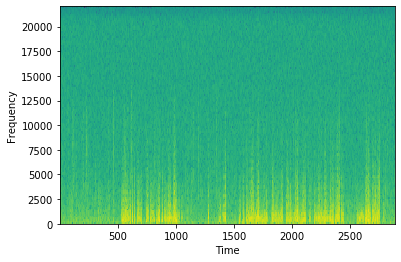

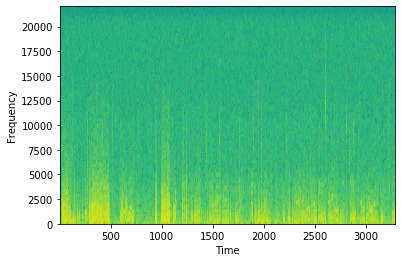

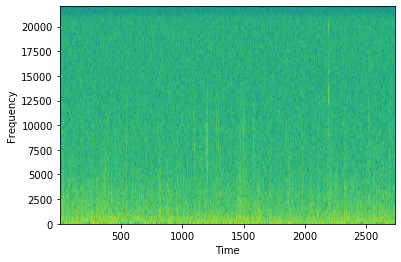

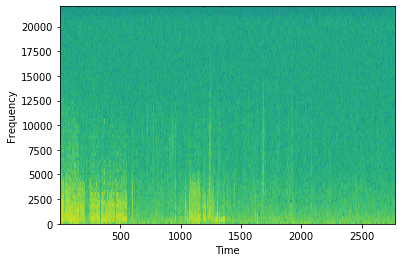

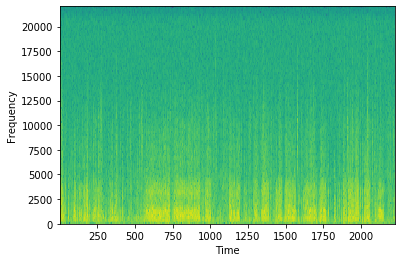

In [4]:
#spectrographs for every recording with matplotlib
for file in range(0, len(audio_files), 1):
    samplingFrequency, signalData = wavfile.read(audio_files[file])

    plot.specgram(signalData,Fs=samplingFrequency)
    plot.xlabel('Time')
    plot.ylabel('Frequency')
    
    plot.show()

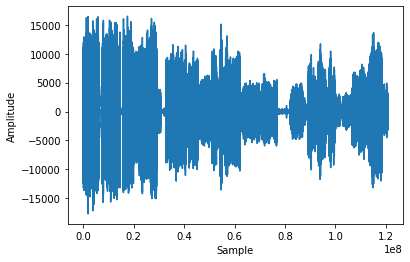

In [ ]:
#waveforms of every file

for file in range(0, len(audio_files), 1):
    samplingFrequency, signalData = wavfile.read(audio_files[file])
    
    plot.plot(signalData)
    plot.xlabel('Sample')
    plot.ylabel('Amplitude')

    plot.show()

In [ ]:
#Concatenating multiple files with sox and converting into spectrogram (TODO: make this into loop)
#script used for concatenation: sox -n -r 44100 -c 2 /tmp/silence.wav trim 0.0 2; sox $(for f in *.wav; do echo -n "$f /tmp/silence.wav "; done) output.wav

samplingFrequency, signalData = wavfile.read("audio/converted/joined/output.WAV")

plot.specgram(signalData,Fs=samplingFrequency)
plot.xlabel('Time')
plot.ylabel('Frequency')
    
plot.show()